# Assignment1 

## Matrix 구현 
1. Linear Regression 에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해 주세요 
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해 주세요 

### Data Load 

In [ ]:
import pandas as pd 
data = pd.read_csv("/content/drive/My Drive/assignment1.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [ ]:
data.shape # y:(9,1), X:(9,5)

(9, 6)

In [ ]:
X = data.drop(["y"], axis=1)
y = data.y

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


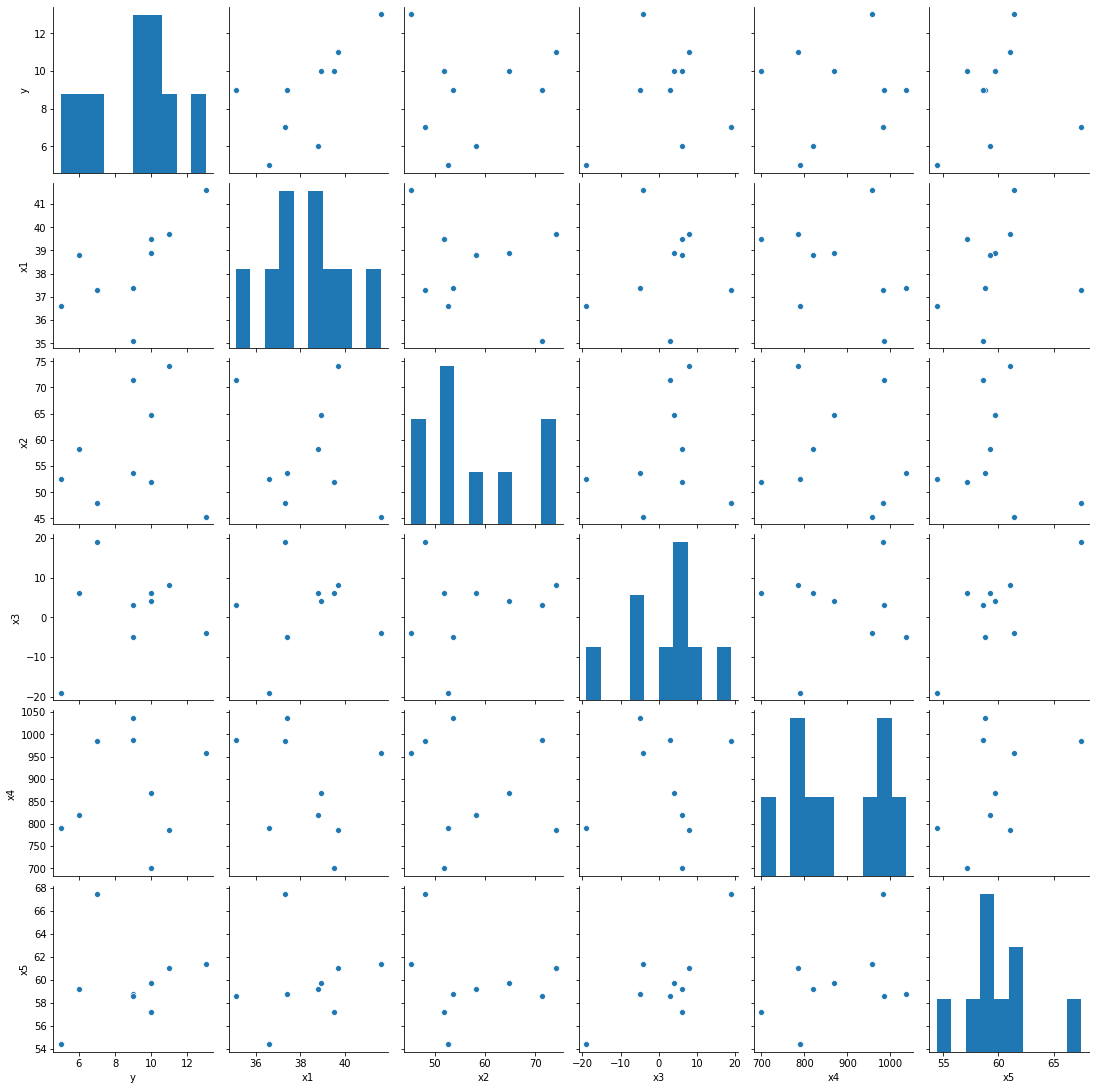

In [ ]:
sns.pairplot(data)

In [ ]:
# matrix 계산을 위해 numpy 형태로 바꾸어 줍니다 
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [ ]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5])

### 1. Normal Equation

In [ ]:
import numpy as np
from numpy.linalg import inv 

In [ ]:
np.ones((2,1))

array([[1.],
       [1.]])

In [ ]:
designX = np.concatenate((np.ones((9,1)), X), axis=1)
designX

array([[ 1.000e+00,  3.890e+01,  6.470e+01,  4.000e+00,  8.680e+02,
         5.970e+01],
       [ 1.000e+00,  4.160e+01,  4.530e+01, -4.000e+00,  9.570e+02,
         6.140e+01],
       [ 1.000e+00,  3.970e+01,  7.410e+01,  8.000e+00,  7.860e+02,
         6.100e+01],
       [ 1.000e+00,  3.730e+01,  4.800e+01,  1.900e+01,  9.840e+02,
         6.750e+01],
       [ 1.000e+00,  3.950e+01,  5.190e+01,  6.000e+00,  7.000e+02,
         5.720e+01],
       [ 1.000e+00,  3.740e+01,  5.360e+01, -5.000e+00,  1.037e+03,
         5.880e+01],
       [ 1.000e+00,  3.510e+01,  7.140e+01,  3.000e+00,  9.860e+02,
         5.860e+01],
       [ 1.000e+00,  3.880e+01,  5.830e+01,  6.000e+00,  8.190e+02,
         5.920e+01],
       [ 1.000e+00,  3.660e+01,  5.260e+01, -1.900e+01,  7.910e+02,
         5.440e+01]])

In [ ]:
def estimate_beta(X, y):

    designX = np.concatenate((np.ones((9,1)), X), axis=1)
    beta_hat = np.linalg.inv(designX.T.dot(designX)).dot(designX.T).dot(y)
    
    return beta_hat

In [ ]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [ ]:
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)

In [ ]:
print(model.intercept_) # intercept
print(model.coef_) # 추정된 회귀계수 (intercept제외)

-39.24473678135655
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


### 2. MSE

In [ ]:
a = np.dot(designX,beta_hat)
a

array([10.21307892, 12.25991477, 10.68709119,  6.87086032,  8.39142371,
        9.47262921,  7.8707847 ,  9.11986574,  5.11435143])

In [ ]:
def MSE(X, y, beta_hat):
    designX = np.concatenate((np.ones((9,1)), X), axis=1)
    y_pred = np.dot(designX,beta_hat)
    mse = (y - (y_pred))**2/9-5-1
    
    return mse

In [ ]:
MSE(X, y, estimate_beta(X, y))

array([-5.99495526, -5.93914154, -5.9891209 , -5.99814699, -5.71249804,
       -5.97518018, -5.8583192 , -4.91849308, -5.99854708])